In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
import missingno as msno
import seaborn as sns
from scipy.stats import linregress

In [2]:
# Lectura de archivos
esolmet = pd.read_csv('../data/EsolmetRuoaTo.csv',index_col=0,parse_dates=True)
una     = pd.read_csv('../data/junio_sin_Ti.csv',index_col=0,parse_dates=True)
# concat
data = pd.concat([esolmet,una],axis=1)
data.dropna(inplace=True)
data

,To,TCAire,Ti_003,Ti_01,Ti_001,Ti_0001
tiempo,,,,,,
2019-06-08 00:00:00,19.81,25.348056,23.734570,22.213738,24.660114,25.320876
2019-06-08 00:10:00,19.87,25.311138,23.698887,22.211162,24.614129,25.276017
2019-06-08 00:20:00,19.89,25.274220,23.666798,22.201097,24.572542,25.231255
2019-06-08 00:30:00,19.95,25.228072,23.642928,22.204497,24.537750,25.189127
2019-06-08 00:40:00,19.95,25.187692,23.610513,22.188386,24.499703,25.144453
...,...,...,...,...,...,...
2019-06-23 23:00:00,23.97,26.680580,26.434010,25.852554,26.693331,26.833835
2019-06-23 23:10:00,23.59,26.614819,26.384725,25.818480,26.635389,26.772229
2019-06-23 23:20:00,23.39,26.729035,26.272545,25.636793,26.548248,26.697783


## Regresión lineal

In [3]:
def linear_regression(data,caso,c):
    # Para el caso Ti_ae
    Ti_s = caso
    
    fig, ax = plt.subplots(figsize=(6,6))
    
    
    x = np.linspace(-10,10,2)
    y = x 
    
    X = np.array( data.To-data.To.mean()   )
    Y = np.array( Ti_s-data.To.mean() )
    m,b,r_value, p_value,std_err = linregress(X,Y)
    
    ax.scatter(X,Y)
    ax.plot(x,y,'k-') 
    ax.plot(x,x*m+b,'r-') 
    
    
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    ax.set_box_aspect(1)
    ax.set_ylabel('Ti_s [oC]')
    ax.set_xlabel('Ti   [oC]')
    ax.set_title(f'Regresión lineal de caso c={c}kg/s')
    ax.grid()
    print(m,b,r_value)

0.6038313620585511 3.187129087265515 0.9375109918201228


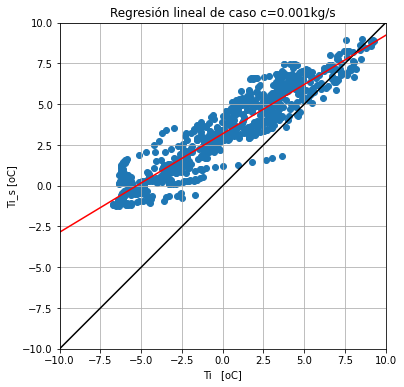

In [4]:
linear_regression(data,data.Ti_0001,'0.001')

0.6349495439627202 2.9579797636864273 0.9461352297722082


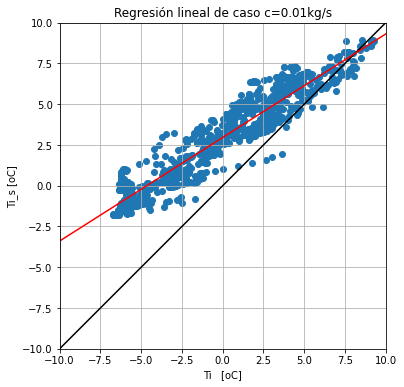

In [5]:
linear_regression(data,data.Ti_001,'0.01')

0.7696906604602455 1.8383115812266877 0.9740104618998058


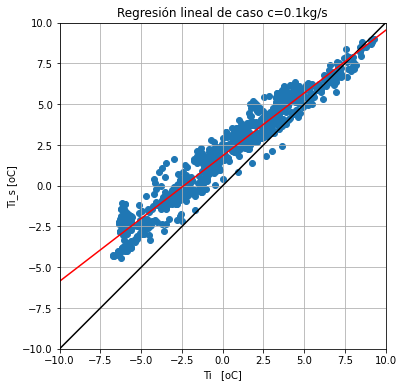

In [6]:
linear_regression(data,data.Ti_01,'0.1')

0.6842541844325019 2.5740425839437258 0.9570383699995831


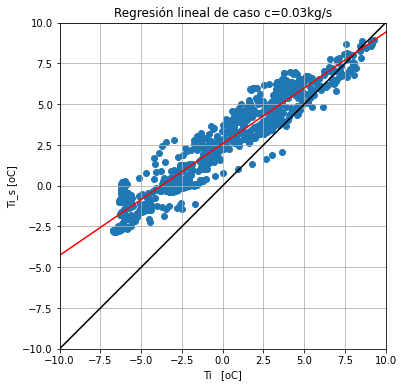

In [7]:
linear_regression(data,data.Ti_003,'0.03')

## Relación de Pearson

In [8]:
data[['Ti_0001', 'Ti_001', 'Ti_01', 'Ti_003','TCAire']].corr()

,Ti_0001,Ti_001,Ti_01,Ti_003,TCAire
Ti_0001,1.000000,0.999026,0.983163,0.994897,0.685027
Ti_001,0.999026,1.000000,0.989617,0.998293,0.684809
Ti_01,0.983163,0.989617,1.000000,0.995958,0.691407
Ti_003,0.994897,0.998293,0.995958,1.000000,0.685474
TCAire,0.685027,0.684809,0.691407,0.685474,1.000000


In [9]:
nombres = ['Ti_0001', 'Ti_001', 'Ti_01', 'Ti_003','TCAire']
for i in nombres:
    print(i,data.TCAire.corr(data[i]))

Ti_0001 0.6850268945485101
Ti_001 0.6848094839639804
Ti_01 0.6914068874578765
Ti_003 0.6854742906369152
TCAire 1.0


## dRMSE

In [10]:
for i in nombres:
    print(i,((data[i] - data.TCAire)**2).mean()**.5)

Ti_0001 2.7533333071051516
Ti_001 2.6388516490575213
Ti_01 2.3483524316721196
Ti_003 2.487725685742245
TCAire 0.0


## Diferencia promedio de Ti

In [11]:
for i in nombres:
    print(i,(data[i]-data.TCAire).mean())

Ti_0001 1.9903833507833915
Ti_001 1.7612340272043014
Ti_01 0.6415658447445622
Ti_003 1.377296847461602
TCAire 0.0


## Diferencia promedio de las temperaturas máximas/mínimas diarias

In [12]:
for i in nombres:
    print(i,(data[i].resample("1D").max() - data.TCAire.resample("1D").max()).mean())

Ti_0001 3.8000912230214667
Ti_001 3.6850597655974706
Ti_01 3.1276445097270127
Ti_003 3.4950206102241723
TCAire 0.0


In [13]:
for i in nombres:
    print(i,(data[i].resample("1D").min() - data.TCAire.resample("1D").min()).mean())

Ti_0001 0.838094975316924
Ti_001 0.3858133794325293
Ti_01 -1.6728020915083792
Ti_003 -0.3358191108026496
TCAire 0.0


## Diferencia promedio del FD

In [14]:
for i in nombres:
    df_s = (data[i].resample("1D").max() - data[i].resample("1D").min()) / (data.To.resample("1D").max() - data.To.resample("1D").min())
    df_e = (data.TCAire.resample("1D").max() - data.TCAire.resample("1D").min()) / (data.To.resample("1D").max() - data.To.resample("1D").min())

    print(i,(df_s - df_e).mean())

Ti_0001 0.26923478085777447
Ti_001 0.2977131140624231
Ti_01 0.4240992460969022
Ti_003 0.34198455128267874
TCAire 0.0
